In [1]:
%matplotlib inline

import ee
ee.Initialize()

### Exporting images, map tiles, features, and videos

Shows how to export assets using Google Earth Engine API.

In [5]:
# prepare export parameters
dem = ee.Image("JAXA/ALOS/AW3D30_V1_1")
region = ee.Geometry.LineString([[93.11668395996094, 28.709710285906034], [93.1486988067627, 28.673946616818256]]).bounds()

In [30]:
# schedule a new export image task
file_name = 'dem'
export_region = region.getInfo()['coordinates'] # BUG: it should just accept region as-is
task = ee.batch.Export.image.toDrive(dem, description=file_name, fileNamePrefix=file_name, region=export_region, scale=30)
task.start()

# remember task id and use it to check tasks status later
task_id = task.id
print(task_id)

RPZYAKKYWM4HCWQR7E6ILJTM


In [31]:
# create a new task using id
task = ee.batch.Task(task_id)

# query task status
task.status()

{'creation_timestamp_ms': 1516292370542,
 'description': 'dem',
 'id': 'RPZYAKKYWM4HCWQR7E6ILJTM',
 'state': 'READY',
 'task_type': 'EXPORT_IMAGE',
 'update_timestamp_ms': 1516292370542}

Tasks state can be one of: 

* __READY__
* __RUNNING__
* __COMPLETED__
* __CANCELLED__
* __CANCEL_REQUESTED__
* __FAILED__

TODO: embed state diagram here

In [36]:
# query current user tasks
tasks = ee.batch.Task.list()

print(len(tasks))
print(tasks[0])

194
<Task EXPORT_IMAGE: dem (READY)>


In [35]:
# list all running tasks (slow)
[t for t in tasks if t.status()['state'] in ['RUNNING', 'READY']]

[<Task EXPORT_IMAGE: dem (READY)>,
 <Task EXPORT_VIDEO: inspection-uk-bad (READY)>,
 <Task EXPORT_VIDEO: inspection-all-uk-bad (READY)>,
 <Task EXPORT_IMAGE: asset-NDWI-5254-v9 (RUNNING)>,
 <Task EXPORT_IMAGE: asset-NDWI-5182-v9 (RUNNING)>,
 <Task EXPORT_IMAGE: asset-NDWI-5110-v9 (RUNNING)>,
 <Task EXPORT_IMAGE: asset-NDWI-5038-v9 (RUNNING)>,
 <Task EXPORT_IMAGE: asset-NDWI-4966-v9 (RUNNING)>,
 <Task EXPORT_IMAGE: asset-NDWI-4894-v9 (RUNNING)>,
 <Task EXPORT_IMAGE: asset-NDWI-4750-v9 (RUNNING)>,
 <Task EXPORT_IMAGE: asset-NDWI-4677-v9 (RUNNING)>,
 <Task EXPORT_IMAGE: asset-NDWI-4749-v9 (RUNNING)>,
 <Task EXPORT_IMAGE: asset-NDWI-4821-v9 (RUNNING)>,
 <Task EXPORT_IMAGE: asset-NDWI-4965-v9 (RUNNING)>,
 <Task EXPORT_IMAGE: asset-NDWI-5037-v9 (RUNNING)>]

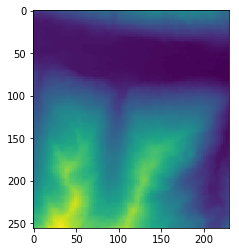

In [46]:
# preview image being exported
from utils import show

image = dem.visualize(**{ 'min': 3800, 'max': 5260, 'bands': ['MED'] })
show(image, 'export_preview.png', region=region)